<p style = "font-size : 50px; color : #532eff ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>Makine Öğrenmesi Modellerinin Analizi ve Karşılaştırılması</strong></p>

<p style = "font-size : 25px; color : #532e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>İbrahim AYDIN-Y220237017 Yazılım Müh. YL (Tezli) 1.Dönem Vize Ödevi</strong></p>

<a id = '1.0'></a>
<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';  "><strong>Kullanılan Dataset (Diabetes.csv) Öznitelikleri:</strong></p>

<ul>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Pregnancies: Hamile Sayısı</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Glucose: Plazma Glikoz Konsantrasyonu</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>BloodPressure: Kan Basıncı(mm Hg)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>SkinThickness: Cilt Kalınlığı(mm)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Insulin: Serum İnsulin Değeri(mu U/ml)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>BMI: Boy-Kilo indeksi(kg/( m)^2)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>DiabetesPedigreeFunction: Soyağacının fonksiyonu</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Age:Yaş </strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Outcome: Çıktı (Sağlıklı:0 veya Şeker Hastası:1)</strong></li>
</ul>



  

 



### KÜTÜPHANELERİ YÜKLEDİKTEN SONRA VERİ SETİMİ HAZIR HALE GETİRİYORUM

In [1]:
#Kütüphaneleri import ediyorum.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# DataSeti tüklüyor ve yazdırıyorum.

data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
 #Hem Kayıt sayısını, hem veri tiplerini hem de veri girilmemiş alanları göreyim.
    
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
#768 tane kaydın olduğunu ve null verisi olmadığını görüyorum. Fakat kayıtlarda insülin değerlerinden 0 oalnlar var. 
# Aşağıdaki değerler 0 değeri olamaz:
# Glucose, BloodPressure, SkinThickness, Insulin, BMI 
# Bu 0 değerleri yanlış girilmiştir. Bu değerleri değiştirmek gerekiyor.

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
 # Hangi değişkende kaç tane 0 değeri var? Göreyim:
    
data.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [5]:
# Glucose, BloodPressure, SkinThickness, Insulin,BMI,Yaş gibi değerlerin 0 olamayacağını belirliyorum. 
# Ve İşleme katılmaması gereken 0 değerlerini NaN ile değiştriyorum. Yeni Seti eşitliyorum.

data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

In [6]:
# Şimdi de NaN ile ifade ettiğim eksik değerlerin yerine her bir özelliğin ortalaması ile dolduruyorum.
data.fillna(data.mean(),inplace=True)


In [7]:
data.head() #DataSeti tekrar yazdırdığımızda 0 değerlerinin yerine ortalama değerlerin geldiğini görüyorum.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [8]:
#Son kontrollerimi yapıyorum.Null ve 0 değerleri sayısına bakıyroum
data.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

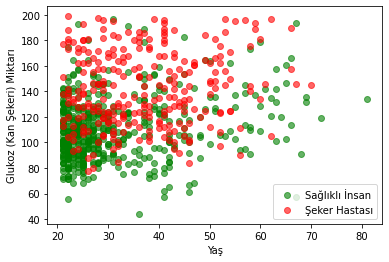

In [10]:
# Outcome = 1 Diabet/Şeker Hastası
# Outcome = 0 Sağlıklı

seker_hastalari = data[data.Outcome == 1]
saglikli_insanlar = data[data.Outcome == 0]


# Şimdilik sadece glukoza'a bakarak örnek bir çizimini yapıyorum:
# Programımızın sonunda makine öğrenme modelim sadece glukoza değil tüm diğer verilere bakarak bir tahmin yapacaktır.

plt.scatter(saglikli_insanlar.Age, saglikli_insanlar.Glucose, color="green", label="Sağlıklı İnsan", alpha = 0.6)  #0.6 değeri değiştirilebilir
plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose, color="red", label="Şeker Hastası", alpha = 0.6)         #0.6 değeri değiştirilebilir
plt.xlabel("Yaş")
plt.ylabel("Glukoz (Kan Şekeri) Miktarı")
plt.legend()
plt.show()

In [11]:
#Korelasyon Analizi yaparak hangi değişkenler birbiriye ne kadar ilişkili olduğuna bakıyırum.
#İki özellik arasında korelasyonun düşük olmasını, çıktıyı etki derecesinin (korelasyonun) yüksek olmasını bekliyorum.
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


#### Görülen şu ki mesela ilk kayıt olan hamilelik sayısı ile şeker hastalığının arasındaki ilişki 0.22 (%22) imiş.Glukoz miktarıyla ise şeker hastalığı arasındaki ilişki ise 0.49 (%49) imiş.

In [12]:
# Korelasyon ısı haritasında görelim. Yüksek değerler daha yüksek ısıda görülecek. Böylece hangi özellik değerleri sonuca daha etkilidir görüyorum.
# Grekirse özelliğe sonuca etkililiğine göre katsayı vereceğim.

import seaborn as sns # Grafik kütüphanesi. 


<AxesSubplot:>

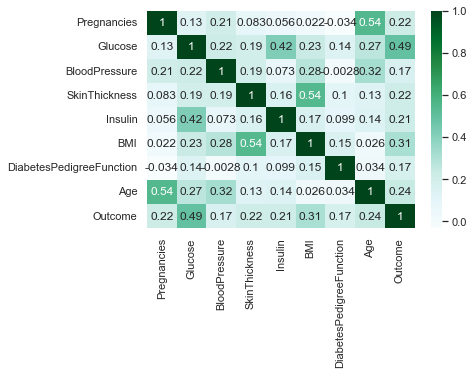

In [13]:
sns.set(style="white")
sns.heatmap(data.corr(),cbar=True,cmap='BuGn',annot=True)

In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Koyu renkler baskın ilişkiyi gösteriyor.Mesela Şeker hastalığı ile en ilişkili değer %49 (0.49) ile Glikoz değeridir.  

### Özniteliklerin değişim değerlerini grefiklerde gösteriyorum

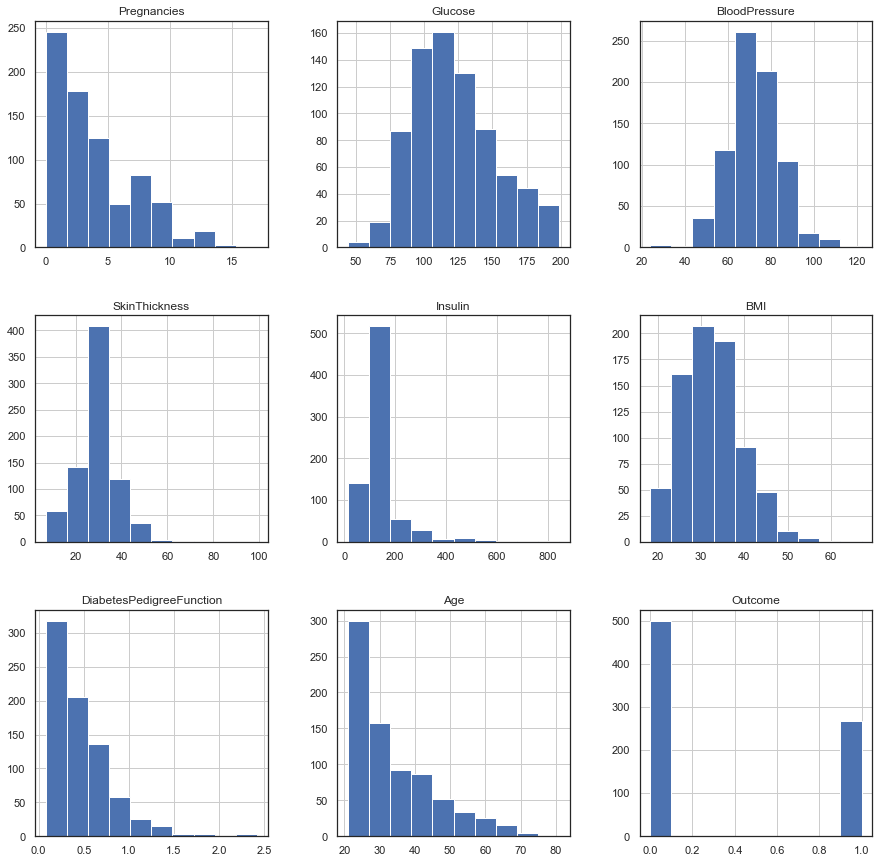

In [15]:
p=data.hist(figsize = (15,15))

#### Grfikte 768 kaydın 500 kaydının sağlıklı ve 268 kaydın ise şeker hastası olduğunu görüyorum.

In [16]:
print(data.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


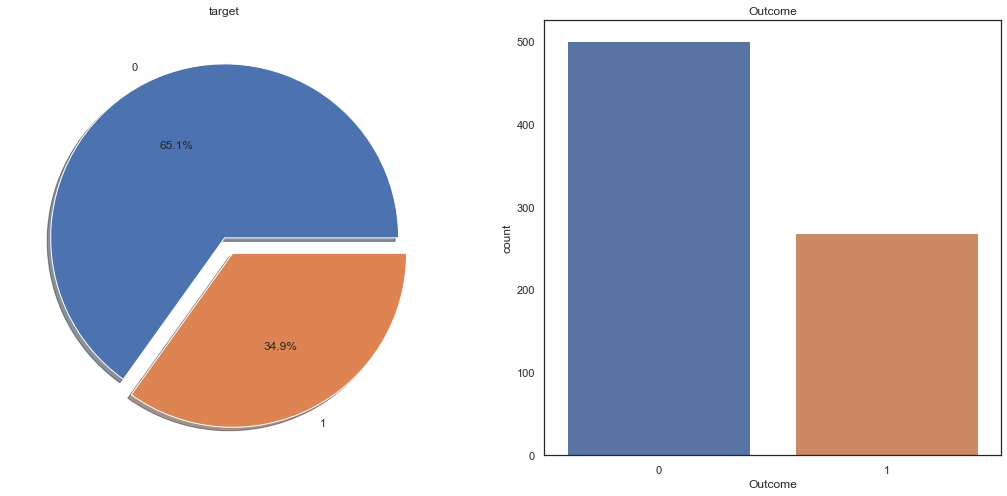

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=data,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

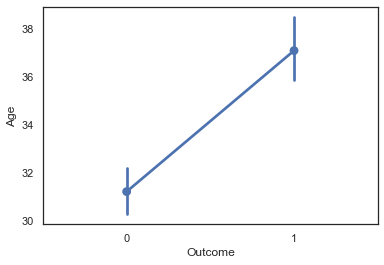

In [18]:
# Yaşa göre şeker hastalığının değişimini görmek istiyorum. Yaş ilerledikçe riskin arttığını görmek istiyorum

sns.pointplot(x='Outcome', y= 'Age', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

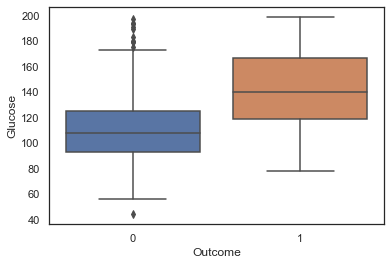

In [19]:
# Glikoz miktarına  göre şeker hastalığının değişimini görmek istiyorum. Glikoz miktarının hangi değerinden sonra riskin arttığını görmek istiyorum.

sns.boxplot(x='Outcome',y='Glucose',data=data)

#### Çift grafiği, iki değişken arasındaki ilişkiyi açıklamak veya en ayrı kümeleri oluşturmak için en iyi özellik kümesini anlamak için kullanılır. Ayrıca veri setimizde bazı basit çizgiler çizerek veya doğrusal ayrım yaparak bazı basit sınıflandırma modellerinin oluşturulmasına yardımcı olur. Her bir özniteliğin Şeker hastalığı ile ilişkisini göreyim:

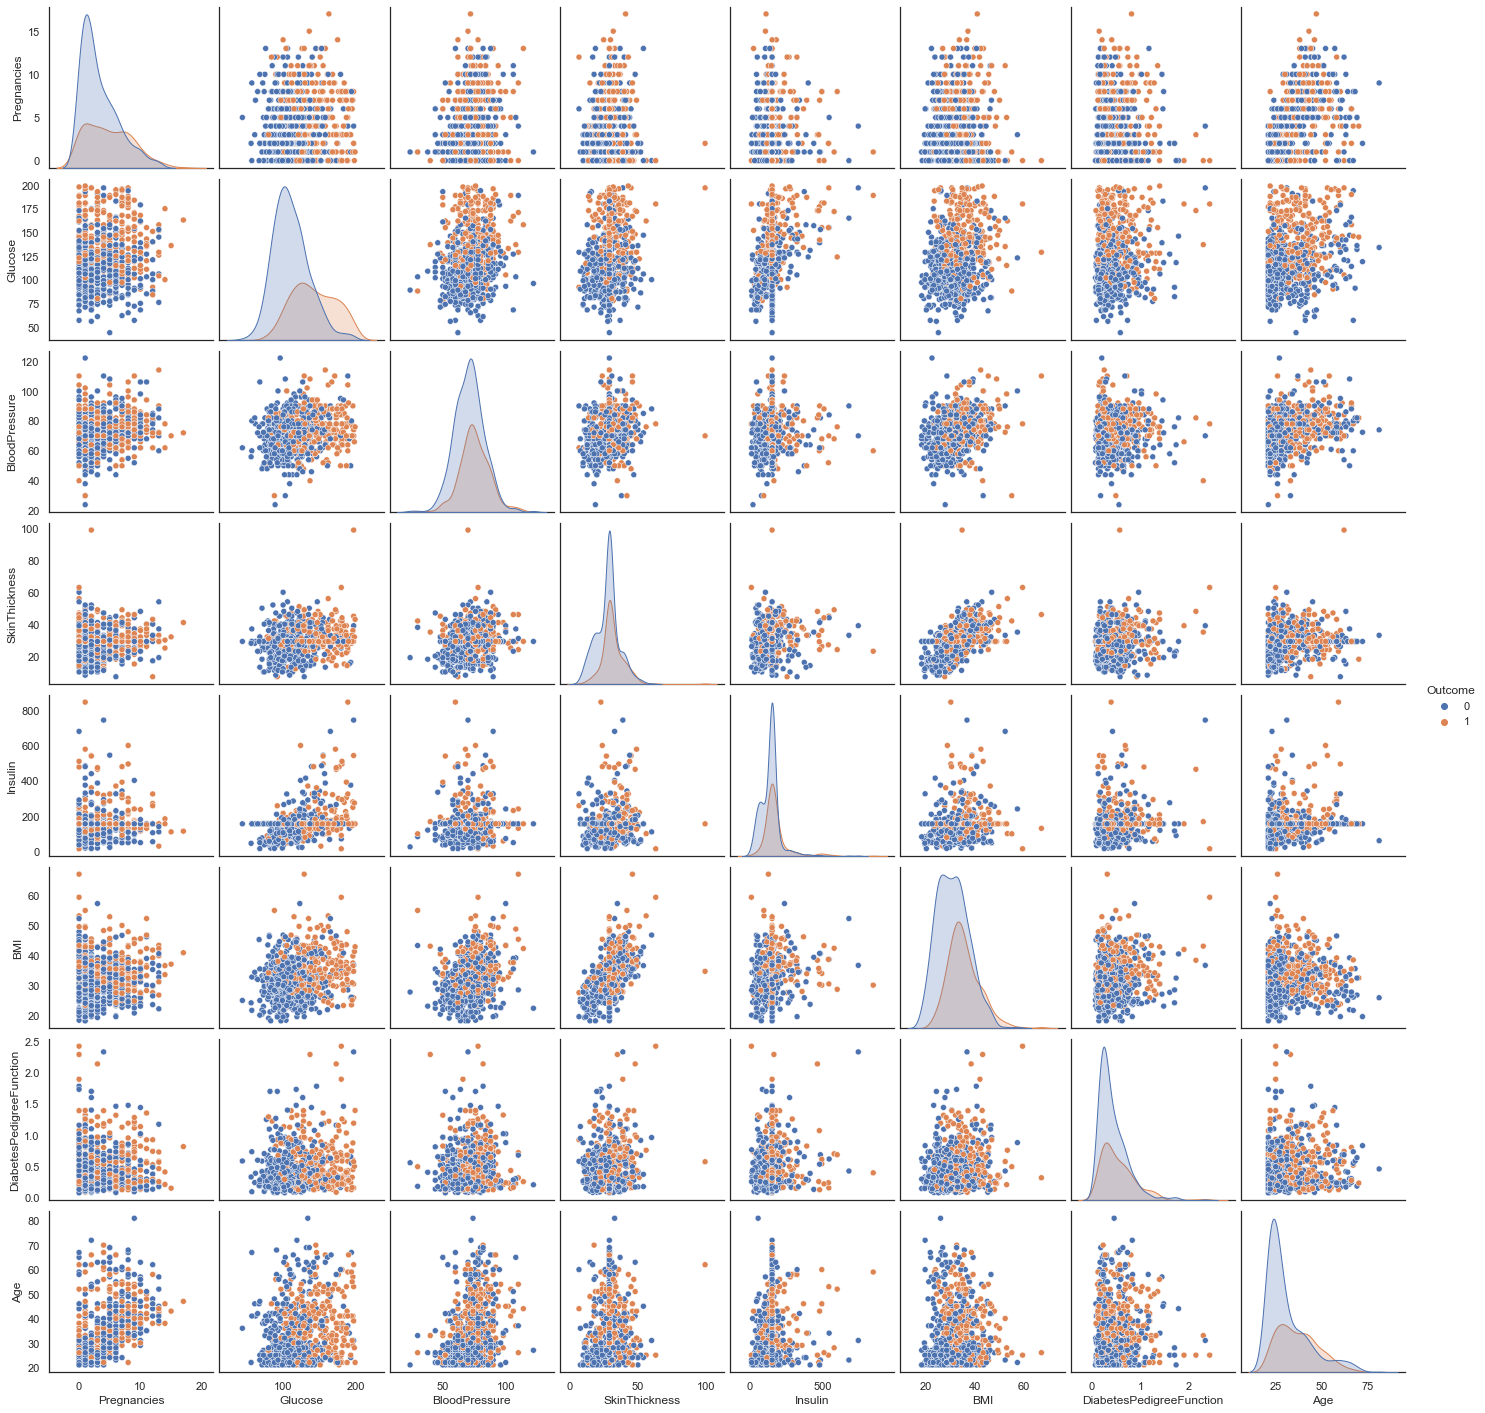

In [20]:
sns.pairplot(data,hue='Outcome')

#### Burada Mavi olan değerler sağlıklı insanları (0), Turuncu değerler ise Şeker hastalarını(1) temsil ediyor. 

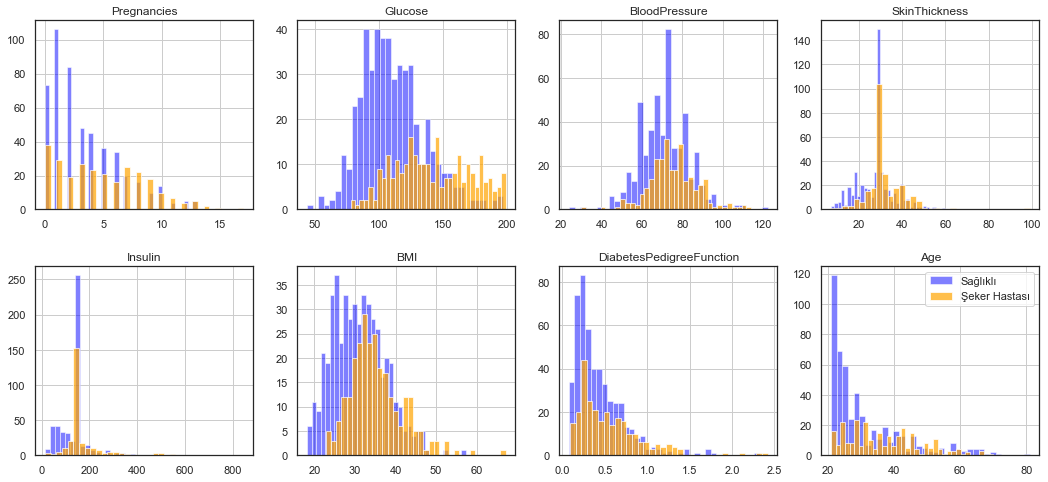

In [21]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    

    data[data.Outcome==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    data[data.Outcome==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['Sağlıklı', 'Şeker Hastası'])
fig.subplots_adjust(hspace=0.3)

## VERİ SETİMİ İNCELEDİM. 

### ÖĞRETİMDE KULLANACAĞIM VERİ SETİNİ AYARLIYORUM. SONRASINDA NORMALİZASYONA GİDİYORUM.

In [22]:
# x ve y eksenlerini belirliyorum
y = data.Outcome.values
x_ham_veri = data.drop(["Outcome"],axis=1)    # Bağımlı Değişken (dependent variable) olan Outcome sütununu çıkarıyorum, 

#Çüknü KNN algoritması x değerleri ile eğitim yapacak..
    
# normalization yapıyorum - x_ham_veri içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelliyorum
# Eğer bu şekilde normalization yapmazsam yüksek rakamlar küçük rakamları ezer ve KNN algoritmasını yanıltabilir!
x = (x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))

# önce
print("Normalization öncesi ham veriler:\n")
print(x_ham_veri.head())


# sonra 
print("\n\n\nNormalization sonrası yapay zekaya eğitim için vereceğimiz veriler:\n")
print(x.head())
    



Normalization öncesi ham veriler:

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



Normalization sonrası yapay zekaya eğitim için vereceğimiz veriler:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.170130  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.170130  0.171779  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


<p style = "font-size : 25px; color : #C52e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>K-EN YAKIN KOMŞU (KNN) MODELİ</strong></p>

### VERİ SETİMİ %80 ÖĞRENME İÇİN, %20 TEST İÇİN AYIRIYORUM

In [23]:
from sklearn.model_selection import train_test_split        
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=1)


# x normalize edilmiş değerler, y ise outcome yani 0-1
# test_size ve random_state değeri ile oynayarak doğrullama test sonucunu değiştirebilirim.
# Burada Datasetin %20sini (test_size=0.2) test için kullanacağım. (Yaklaşık 150 kişi) (Toplam 768 kayıt var)
# %80 kısmını ise eğitmede kullanacağım.(Yaklaşık 600 kişi)... Töreler böyle :)
# Bu seçimleri ise random şekilinde yapacağım.


# knn modelimi oluşturuyorum.
knn = KNeighborsClassifier(n_neighbors = 3)     # n_neighbors = k=3 (En yakın komşuluk sayısını 3 vermiş oluyorum) (Bu k sayısı ile oynayacağım)
knn.fit(x_train,y_train)                        # Modelimi fit ediyorum yani eğitiyorum. X noramlize değerleri ve outcome(Çıktı) değerleriyle...
prediction = knn.predict(x_test)                # %20 lik kısmı test için veriyorum.

print("Öğretim için kullanılan kayıt sayısı=",len(x_train));
print("Test için kullanılan kayıt sayısı=",len(x_test));
# K=3 için  Modelimin doğruluk oranını yazdırıyorum.
print("K=3 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = %", knn.score(x_test, y_test)*100)  



Öğretim için kullanılan kayıt sayısı= 614
Test için kullanılan kayıt sayısı= 154
K=3 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = % 79.87012987012987


In [24]:
from sklearn.model_selection import train_test_split        
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=1)
# En yüksek doğruluk için k değeri kaç olmalı ?
# en iyi k değerini bulalım..
# for döngüsüyle k değerini 1 den 10 değerine kadar deneyeceğim. Sonuçları yazdıracağım. 
# Daha çok ve büyük k değeri seçimi  modelimi yavaşlatabilir ve doğru sonuç vermeyebilir.

sayac = 1
for k in range(1,41):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    print("K= ",sayac, "için Doğruluk Oranı= %", knn_yeni.score(x_test,y_test)*100)
    sayac += 1
    
 
     

K=  1 için Doğruluk Oranı= % 70.12987012987013
K=  2 için Doğruluk Oranı= % 74.67532467532467
K=  3 için Doğruluk Oranı= % 79.87012987012987
K=  4 için Doğruluk Oranı= % 75.97402597402598
K=  5 için Doğruluk Oranı= % 81.81818181818183
K=  6 için Doğruluk Oranı= % 79.87012987012987
K=  7 için Doğruluk Oranı= % 79.87012987012987
K=  8 için Doğruluk Oranı= % 79.22077922077922
K=  9 için Doğruluk Oranı= % 81.16883116883116
K=  10 için Doğruluk Oranı= % 79.87012987012987
K=  11 için Doğruluk Oranı= % 81.81818181818183
K=  12 için Doğruluk Oranı= % 80.51948051948052
K=  13 için Doğruluk Oranı= % 81.81818181818183
K=  14 için Doğruluk Oranı= % 82.46753246753246
K=  15 için Doğruluk Oranı= % 83.11688311688312
K=  16 için Doğruluk Oranı= % 81.81818181818183
K=  17 için Doğruluk Oranı= % 82.46753246753246
K=  18 için Doğruluk Oranı= % 79.22077922077922
K=  19 için Doğruluk Oranı= % 81.81818181818183
K=  20 için Doğruluk Oranı= % 81.81818181818183
K=  21 için Doğruluk Oranı= % 81.81818181818183
K

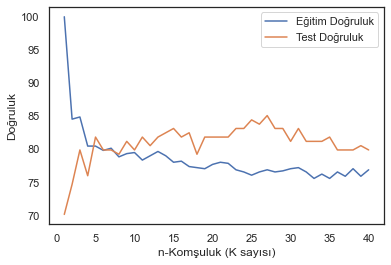

In [25]:
egitim_dogruluk=[]
test_dogruluk=[]
from sklearn.model_selection import train_test_split        
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=1)
for komsu in range(1,41):   
    knn_yeni2 = KNeighborsClassifier(n_neighbors = komsu)
    knn_yeni2.fit(x_train,y_train)
    egitim_dogruluk.append(knn_yeni2.score(x_train,y_train)*100)
    test_dogruluk.append(knn_yeni2.score(x_test,y_test)*100)                    

sayi= range(1,41)  
plt.plot(sayi,egitim_dogruluk,label="Eğitim Doğruluk")
plt.plot(sayi,test_dogruluk,label='Test Doğruluk')
plt.ylabel('Doğruluk')
plt.xlabel('n-Komşuluk (K sayısı)')
plt.legend()

### Grafikte En yüksek tahminli test sonucu değerinin K=5 değerinde olduğu görünüyor.(%81.81).  Sonuçları doğru değerlendirmek için eğitim verisi ve test verisinin benzer özelliklere sahip olması gerekir. İki eğimin birbirine oldukça yakın olması tercih edilmelidir. K=27 değerinde doğruluk oranı yğksek olsa da öğretme oranı düşük olduğu için yüksek uydurma söz konusudur. Overfiting olmaktadır. TEST DOĞRULUK DEĞERİ YÜKSEK OLAN 5 DEĞERİ K DEĞERİ OLARAK (KOMŞULUK SAYISI) MODELDE TERCİH EDİLDİ...

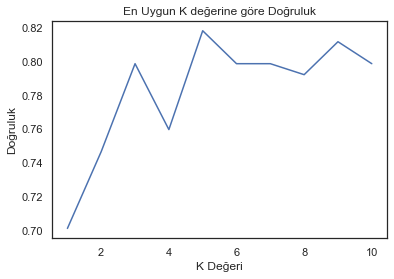

In [26]:
score_list=[]
from sklearn.model_selection import train_test_split        
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=1)

for each in range(1,11):   
    knn_yeni3 = KNeighborsClassifier(n_neighbors = each)
    knn_yeni3.fit(x_train,y_train)
    score_list.append(knn_yeni3.score(x_test,y_test))

plt.title("En Uygun K değerine göre Doğruluk")
plt.plot(range(1,11),score_list)
plt.xlabel("K Değeri")
plt.ylabel("Doğruluk")
plt.show()
                    

### 1-10 değerleri arasında K=5 değerinin verimini daha yakından gördüm. Ayrıca çift sayılarda tahmin iki eşit değerde olabileceği için doğruluk değerlerinin hep düştüğünü gözlemledim. Tek sayılarda çoğunluk komşuluk hangi tarafa yakınsa o taraf daha doğru tahmin edilmektedir. 

### ÖYLEYSE Modelimi K=5 ile %81.81 doğruluk oranında %80 veri ile eğitiyorum

In [27]:
# En iyi K değeri olan 5 değerini modelime uyguluyorum. %81.81 doğruluk oranını tekrar test ediyorum. 
# %80 eğitim, %20 test, K=5
from sklearn.model_selection import train_test_split        
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=1) 
knn = KNeighborsClassifier(n_neighbors =5)    
knn.fit(x_train,y_train)                        
prediction = knn.predict(x_test)                
print("Öğretim için kullanılan kayıt sayısı=",len(x_train));
print("Test için kullanılan kayıt sayısı=",len(x_test));
# K=7 için  Modelimin doğruluk oranını yazdırıyorum.
print("K=5 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = %", knn.score(x_test, y_test)*100) 

Öğretim için kullanılan kayıt sayısı= 614
Test için kullanılan kayıt sayısı= 154
K=5 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = % 81.81818181818183


### Modelimin doğruluk oranını değişik K değerleri ve %Test Verisi değerleri ile kıyaslıyorum

In [28]:
# Eğer eğitici data sayımı %80 den %90 a yükseltirsem o zaman %10 test için kalacak.
# %90 eğitim, %10 test, K=5
from sklearn.model_selection import train_test_split        
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.10,random_state=1)
  #test_size=0.1 (%10 test için ayır)
knn = KNeighborsClassifier(n_neighbors =5)  # K=5 
knn.fit(x_train,y_train)                        
prediction = knn.predict(x_test)                

# K=7 için  Modelimin doğruluk oranını yazdırıyorum. En iyi sonucun %80 de olduğunu görüp töreleri kabul ediyorum :)
print("K=5 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = %", knn.score(x_test, y_test)*100) 



K=5 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = % 77.92207792207793


In [29]:
# Eğer eğitici data sayımı %80 den %70 e indirirsem o zaman %30 test için kalacak.
# %70 eğitim, %30 test, K=7
from sklearn.model_selection import train_test_split        
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=1)
 #test_size=0.1 (%30 test için ayır)
knn = KNeighborsClassifier(n_neighbors =7)  # K=7  
knn.fit(x_train,y_train)                        
prediction = knn.predict(x_test)                

# K=5 için  Modelimin doğruluk oranını yazdırıyorum. Daha az öğrettiğim için daha da düşük doğruluk oranı beliyorum.
print("K=7 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = %", knn.score(x_test, y_test)*100) 


K=7 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = % 79.65367965367966


In [30]:
# Eğer eğitici data sayımı %80 den %50 e indirirsem o zaman %50 test için kalacak.
# %50 eğitim, %50 test, K=7
from sklearn.model_selection import train_test_split        
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.50,random_state=1)
  #test_size=0.1 (%50 test için ayır)
knn = KNeighborsClassifier(n_neighbors =7)  # K=7  
knn.fit(x_train,y_train)                        
prediction = knn.predict(x_test)                

# K=7 için  Modelimin doğruluk oranını yazdırıyorum. Daha az öğrettiğim için daha da düşük doğruluk oranı beliyorum.
print("K=7 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = %", knn.score(x_test, y_test)*100) 


K=7 için Test verilerimizin doğrulama testi sonucu (Model Doğruluğu) = % 77.34375


### Modelime Kesin Kararımı Verdim

In [31]:
# Artık Modelimi oluşturdum ve değerleri buldum. Modele karar verdim.
# %80 eğitim, %20 test, K=5 (%81.81 Doğruluk oranı) 
from sklearn.model_selection import train_test_split        
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=1)
 
knn = KNeighborsClassifier(n_neighbors =5)    
knn.fit(x_train,y_train)                        
prediction = knn.predict(x_test)                

# K=5 için  Modelimin doğruluk oranını yazdırıyorum.
print("K=5, % 80 Veri Öğretimi ile TERCİH ETTİĞİM MODELİMİN DOĞRULUK ORANI = %", knn.score(x_test, y_test)*100) 

K=5, % 80 Veri Öğretimi ile TERCİH ETTİĞİM MODELİMİN DOĞRULUK ORANI = % 81.81818181818183


### Şimdi Hasta Tahmini İsteyeceğim

In [32]:
#DataSet verilerimi tekrar yazdırıyorum
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [33]:
# Yeni bir hasta tahmini için kütüphaneyi çağırıyorum.
from sklearn.preprocessing import MinMaxScaler

# normalization yapıyoruz - daha hızlı normalization yapabilmek için MinMax  scaler kullandık...
sc = MinMaxScaler()
sc.fit_transform(x_ham_veri)

# Değerleri sırasıyla veriyorum. 
# İlk kaydın (şeker hastasıolarak verilen) verilerini girip test ediyorum. %81.81 ihtimalle "şeker hastası" çıkmalı sonuç.

new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,155,33.6,0.627,50]]))) 

#Sonuç 0 gelirse sağlıklı insan , 1 Gelirse Şeker Hastası insan tahminini anlıyorum. 

if(new_prediction[0]==1):
    print ("Şeker Hastası")
else:
    print ("Sağlıklı İnsan")

Şeker Hastası


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [34]:
# Yeni bir hasta tahmini için kütüphaneyi çağırıyorum.
from sklearn.preprocessing import MinMaxScaler

# normalization yapıyoruz - daha hızlı normalization yapabilmek için MinMax  scaler kullandık...
sc = MinMaxScaler()
sc.fit_transform(x_ham_veri)

#Değerleri sırasıyla veriyorum. 
# İkinci kaydın (sağlıklı) verilerini girip test ediyorum. %81 ihtimalle "Sağlıklı İnsan" çıkmalı sonuç.

new_prediction = knn.predict(sc.transform(np.array([[1,85,66,29,155,26.6,0.351,31]]))) 

#Sonuç 0 gelirse sağlıklı insan , 1 Gelirse Şeker Hastası insan tahminini anlıyorum.

if(new_prediction[0]==1): #Sonuç 0 gelirse sağlıklı insan , 1 Gelirse Şeker Hastası insan tahminini anlıyorum. 
    print ("Şeker Hastası")
else:
    print ("Sağlıklı İnsan")

Sağlıklı İnsan


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Sonuç: KNN Algoritması ile oluşturduğum modelim %81.81 oran ile doğru tahmin üretmektedir.

<p style = "font-size : 40px; color : #C52e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>SKLEARN İLE MODEL KARŞILAŞTIRMASI</strong></p>

In [128]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [129]:
import pandas as pd

In [130]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [423]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear",C=0.01),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=4),
    ExtraTreesClassifier(n_estimators=20, min_samples_split=3),
    RandomForestClassifier(max_depth=10, n_estimators=500),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="huber", penalty="l2")]

In [424]:
import pandas as pd
import seaborn as sns

In [425]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

In [450]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df


,name,score
0,Nearest_Neighbors,0.820
1,Linear_SVM,0.825
2,Polynomial_SVM,0.785
3,RBF_SVM,0.810
4,Gaussian_Process,0.835
5,Gradient_Boosting,0.780
6,Decision_Tree,0.830
7,Extra_Trees,0.830
8,Random_Forest,0.825
9,Neural_Net,0.845


<p style = "font-size : 40px; color : #C52e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>Algoritma Analizleri</strong></p>

<p style = "font-size : 20px; color : #C52e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>K Neighbors Classifier</strong></p>

**K=3 iken Score= 0.820**,
K=5 iken Score= 0.805,
K=7 iken Score= 0.815,
K=9 iken Score= 0.810,
K=11 iken Score= 0.820



<p style = "font-size : 20px; color : #C52e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>Linear_SVM</strong></p>

C=0.025 iken Score= 0.815, C=0.001 iken Score= 0.815, C=0.00005 iken Score=0.500, C=0.000001 ikeniken Score=0.500, **C=0.1 iken Score= 0.825**

<p style = "font-size : 20px; color : #C52e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>Polynomial_SVM</strong></p>

**degree=3 iken Score=0.785**, degree=2 iken Score= 0.505, degree=4 iken Score=0.555, degree=5 iken Score=0.740, degree=6 iken Score=0.505, 

<p style = "font-size : 20px; color : #C52e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>RBF_SVM</strong></p>

**C=1 ve gamma=2 iken Score=0.810**, C=1 ve gamma=3 iken Score=0.780, C=2 ve gamma=2 iken Score=0.805, C=3 ve gamma=2 iken Score=0.810

<p style = "font-size : 20px; color : #C52e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>Gaussian Process Classifier</strong></p>

**1.0 * RBF(1.0) için Score=0.835**, 1.0 * RBF(0.05) için Score=0.780, 1.0 * RBF(0.005) için Score=0.500, 1.0 * RBF(0.01) için Score=0.505, 1.0 * RBF(0.2) için Score=0.835

<p style = "font-size : 20px; color : #C52e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>Gradient Boosting Classifier</strong></p>

**n_estimators=100 ve learning_rate=1.0 iken Score=0.785**, n_estimators=200 ve learning_rate=1.0 iken Score=0.785, n_estimators=100 ve learning_rate=2.0 iken Score=0.205, n_estimators=300 ve learning_rate=1.0 iken Score=0.765,n_estimators=400 ve learning_rate=1.0 iken Score=0.760

<p style = "font-size : 20px; color : #C52e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>Decision Tree Classifier</strong></p>

max_depth=5 iken Score=0.825, **max_depth=4 iken Score=0.830**, max_depth=3 iken Score=0.815, max_depth=6 iken Score=0.820, max_depth=7 iken Score=0.795,max_depth=8 iken Score=0.795

<p style = "font-size : 20px; color : #C52e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>Extra Trees Classifier</strong></p>

n_estimators=10 ve min_samples_split=2 iken Score=0.825, n_estimators=10 ve min_samples_split=3 iken Score=0.820, n_estimators=10 ve min_samples_split=4 iken Score=0.815, **n_estimators=20 ve min_samples_split=3 iken Score=0.830**, n_estimators=20 ve min_samples_split=5 iken Score=0.830, n_estimators=20 ve min_samples_split=6 iken Score=0.825

<p style = "font-size : 20px; color : #C52e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>Random Forest Classifier</strong></p>

max_depth=5 ve n_estimators=100 iken Score=0.820, max_depth=4 ve n_estimators=100 iken Score=0.825, max_depth=5 ve n_estimators=200 iken Score=0.820, **max_depth=10 ve n_estimators=500 iken Score=0.830**, max_depth=20 ve n_estimators=500 iken Score=0.830, max_depth=10 ve n_estimators=700 iken Score=0.830, max_depth=10 ve n_estimators=800 iken Score=0.825

<p style = "font-size : 20px; color : #C52e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>MLP Classifier</strong></p>

**alpha=1 ve max_iter=1000 için Score=0.845**, alpha=2 ve max_iter=1000 için Score=0.835, alpha=1 ve max_iter=2000 için Score=0.845, alpha=3 ve max_iter=1000 için Score=0.825, alpha=4 ve max_iter=1000 için Score=0.820

<p style = "font-size : 20px; color : #C52e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>Ada Boost Classifier</strong></p>

**n_estimators=100 için Score=0.805**, n_estimators=200 için Score=0.775, n_estimators=300 için Score=0.775, n_estimators=500 için Score=0.750, n_estimators=50 için Score=0.810,

<p style = "font-size : 20px; color : #C52e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>Gaussian Naive Bayes</strong></p>

**Score=0.835**

<p style = "font-size : 20px; color : #C52e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>Quadratic Discriminant Analysis</strong></p>

**Score=0.825**

<p style = "font-size : 20px; color : #C52e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>SGD Classifier</strong></p>

**loss="hinge" ve penalty="l2" iken Score=0.810**, loss="squared_hinge" ve penalty="l2" iken Score=0.565, loss="perceptron" ve penalty="l2" iken Score=0.790, loss="squared_error" ve penalty="l2" iken Score=0.675, loss="huber" ve penalty="l2" iken Score=0.765,

<p style = "font-size : 20px; color : #C52e1f ; font-family : 'Times Ner Roman'; text-align : center; background-color : #bedaff; border-radius: 5px 5px;"><strong>EN YÜKSEK SCORE DEĞERLERİNE GÖRE EN YÜKSEK SCORE SONUÇLARI</strong></p>

In [449]:
cm = sns.light_palette("seagreen",as_cmap=True)
s = df.sort_values(by=['score']).style.background_gradient(cmap=cm)
s

,name,score
5,Gradient_Boosting,0.780000
13,SGD,0.780000
2,Polynomial_SVM,0.785000
10,AdaBoost,0.805000
3,RBF_SVM,0.810000
0,Nearest_Neighbors,0.820000
1,Linear_SVM,0.825000
8,Random_Forest,0.825000
12,QDA,0.825000
6,Decision_Tree,0.830000


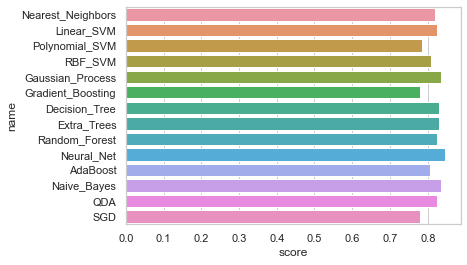

In [446]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score",data=df)

## Sonuç olarak,  **Neural_Net (MLP Classifier)** algoritması **alpha=1 ve max_iter=1000 için Score=0.845 (%84.5 Doğruluk Oranı)** değerleri ile geçerli model için en yüksek score puanını veren  algoritma olmuştur. 

## Kaynaklar

Nahzat, S. & Yağanoğlu, M. (2021). Diabetes Prediction Using Machine Learning Classification Algorithms. European Journal of Science and Technology, (24), 53-59.

Iancu, I., Mota, M., and Iancu, E. (2008). “Method for the analysing of blood glucose dynamics in diabetes mellitus patients,” in Proceedings of the 2008 IEEE International Conference on Automation, Quality and Testing, Robotics, Cluj-Napoca. doi: 10.1109/AQTR.2008.4588883 Robertson, G., 

Soni. M and Varma. S (2020), Diabetes Prediction using Machine Learning Techniques, International Journal of Engineering Research & Technology (IJERT)

Tejas N. Joshi, Prof. Pramila M. Chawan, Diabetes Prediction Using Machine Learning Techniques, January 2018, Int. Journal of Engineering Research and Application, Vol. 8, Issue 1, (Part -II), pp.-09-13

Parashar, A., Burse, K., & Rawat, K. (2014). A Comparative approach for Pima Indians diabetes diagnosis using ldasupport vector machine and feed forward neural network. International Journal of Advanced Research in Computer Science and Software Engineering, 4(11), 378-383.

Al Helal, M., Chowdhury, A. I., Islam, A., Ahmed, E., Mahmud, M. S., & Hossain, S. (2019, February). An optimization approach to improve classification performance in cancer and diabetes prediction. In 2019 International Conference on Electrical, Computer and Communication Engineering (ECCE) (pp. 1-5). IEEE.

Dataset, P. I. D. UCI Machine Learning Repository, diambil dari http://archive. ics. uci. edu/ml/datasets. Pima+ Indians+Diabetes. Accessed (October, 2020)

Fawagreh, K., Gaber, M. M., & Elyan, E. (2014). Random forests: from early developments to recent advancements. Systems Science & Control Engineering: An Open Access Journal,2(1), 602-609.

Sisodia D and Sisodia S, Jan. 2018, “Prediction of diabetes using classification algorithms,'' Procedia Comput. Sci., vol. 132, pp. 1578-1585

Maniruzzaman M, Rahman M J, Hasan M, Suri H S, Abedin M M, El-Baz A, and Suri J S, Jan 2020 “Classification and prediction of diabetes disease using machine learning paradigm,'' J. health information science and system., vol. 42, no. 5, p. 92 -103

Kamadi V S, Varma P, Rao A A, Mahalakshmi T S and Rao P V N , July 2014 “A Computational Intelligence approach for a better diagnosis of diabetic patients” , J. Computers and Electrical Engineering , Vol. 40 Issue 5, , p 1758-65.

Maniruzzaman M, Rahman M J, Hasan M, Suri H S, Abedin M M, El-Baz A, and Suri J S, May 2018. “Accurate diabetes risk stratification using machine learning: Role of missing value and outliers,'' J. Medical System, vol. 42, no. 5, p. 92

Tabaei B P and Herman W H, Nov. 2002, “A multivariate logistic regression equation to screen for diabetes: Development and validation,'' Diabetes Care, vol. 25, no. 11, pp. 1999_2003.

Cortes C and V. Vapnik, Sep. 1995 “Support-vector networks,'' Mach. Learn., vol. 20, pp. 

Breiman L, Oct. 2001 “Random forests,'' Mach. Learn., vol. 45, no. 1, pp. 5-32.

Belhouari S B and Bermak A, Nov. 2004, “Gaussian process for nonstationary time series prediction,''Comput. Statist. Data Anal., vol. 47, no. 4, pp. 705-12.

Hasan K, Alam A, Das D, Hussain E and Hasan M, April 2020 “Diabetes prediction using ensembling of different machine learning classifiers”, IEEE Acess, vol. 8, p 76516-31

Javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

